In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = \
pd.read_csv("./data/monthly-milk-production.csv",
           index_col="Month", parse_dates=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   pounds per cow  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


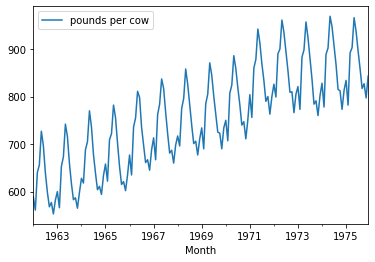

In [4]:
df.plot()

In [5]:
timeseries = df["pounds per cow"]

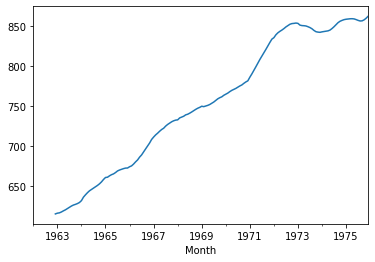

In [6]:
timeseries.rolling(12).mean().plot()

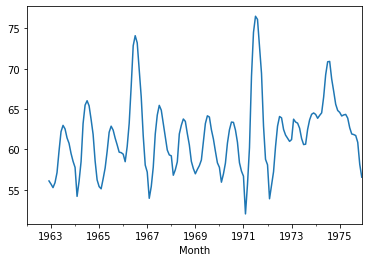

In [7]:
timeseries.rolling(12).std().plot()

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
decomposition = seasonal_decompose(df["pounds per cow"])

<Figure size 432x288 with 0 Axes>

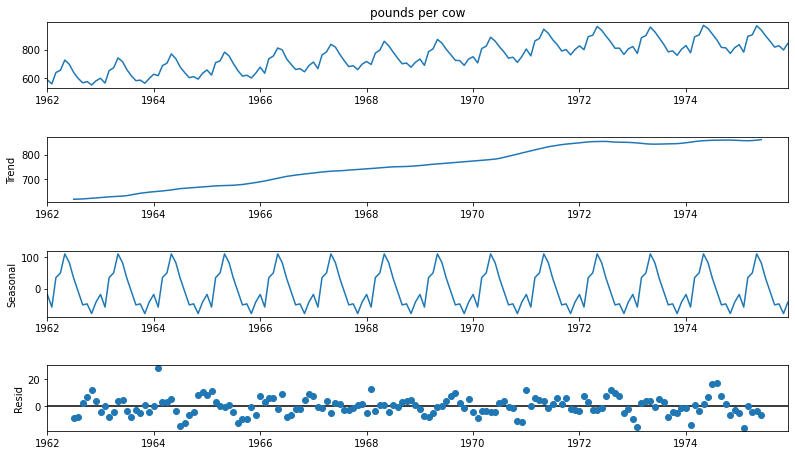

In [10]:
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12,7)

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
result = adfuller(df["pounds per cow"])

In [13]:
result

(-1.3038115874221303,
 0.6274267086030312,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [14]:
def adf_check(ts):
    result = adfuller(ts)
    if result[1] <= 0.05:
        print("Stationary {}".format(result[1]))
    else:
        print("Non-stationary {}".format(result[1]))

In [15]:
adf_check(df["pounds per cow"])

Non-stationary 0.6274267086030312


In [16]:
df["1st diff"] = df["pounds per cow"] - df["pounds per cow"].shift(1)

In [17]:
df.head()

,pounds per cow,1st diff
Month,,
1962-01-01,589,NaN
1962-02-01,561,-28.0
1962-03-01,640,79.0
1962-04-01,656,16.0
1962-05-01,727,71.0


In [18]:
adf_check(df["1st diff"].dropna())

Stationary 0.03006800400178488


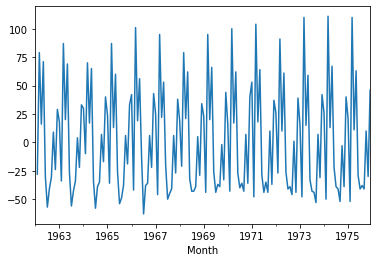

In [19]:
df["1st diff"].plot()

In [20]:
df["2nd diff"] = df["1st diff"] - df["1st diff"].shift(1)

In [21]:
df["2nd diff"].head()

Month
1962-01-01      NaN
1962-02-01      NaN
1962-03-01    107.0
1962-04-01    -63.0
1962-05-01     55.0
Name: 2nd diff, dtype: float64

In [22]:
adf_check(df["2nd diff"].dropna())

Stationary 1.1126989332080988e-26


##### We r still able to see seasonality

In [23]:
df["seasonal diff"] = df["pounds per cow"] - df["pounds per cow"].shift(12)

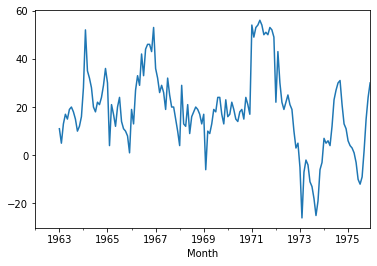

In [24]:
df["seasonal diff"].plot()

In [25]:
adf_check(df["seasonal diff"].dropna())

Non-stationary 0.1607988052771135


In [26]:
df["seasonal 1st diff"] = df["1st diff"] - df["1st diff"].shift(12)

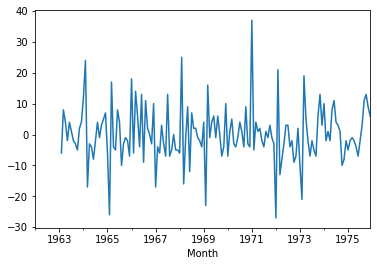

In [27]:
df["seasonal 1st diff"].plot()

In [28]:
adf_check(df["seasonal 1st diff"].dropna())

Stationary 1.865423431878859e-05


d = 1, D = 1

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

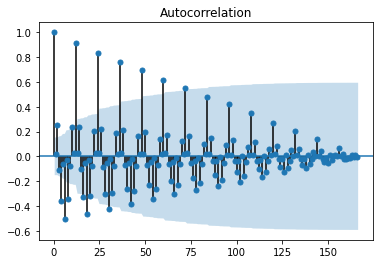

In [44]:
plot_acf(df["1st diff"].dropna(), lags=np.arange(len(df["1st diff"].dropna())));

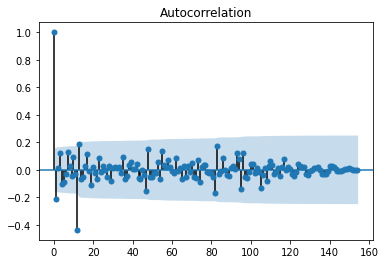

In [45]:
plot_acf(df["seasonal 1st diff"].dropna(), lags=np.arange(len(df["seasonal 1st diff"].dropna())));

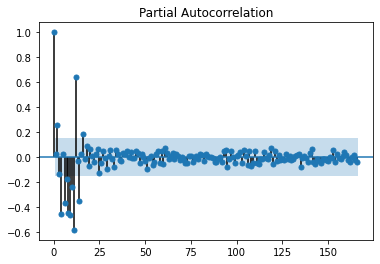

In [46]:
plot_pacf(df["1st diff"].dropna(), lags=np.arange(len(df["1st diff"].dropna())), method="ywm");

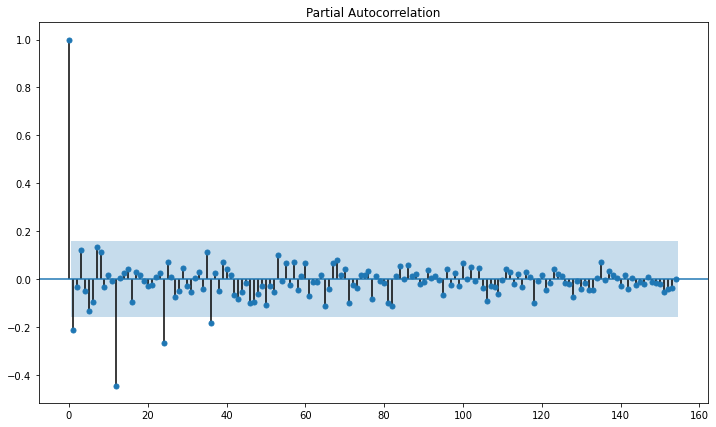

In [60]:
fig = plot_pacf(df["seasonal 1st diff"].dropna(), lags=np.arange(len(df["seasonal 1st diff"].dropna())),\
          method="ywm");
fig.set_size_inches(12,7)

P = 1, Q = 1

p=0, d=1, q=0

P=1, D=1, Q=1

In [62]:
model = sm.tsa.statespace.SARIMAX(df["pounds per cow"],
                                 order=(0,1,0),
                                 seasonal_order=(1,1,1,12))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [63]:
result = model.fit()

In [64]:
print(result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                       pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Wed, 23 Sep 2020   AIC                           1074.131
Time:                                      00:41:00   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

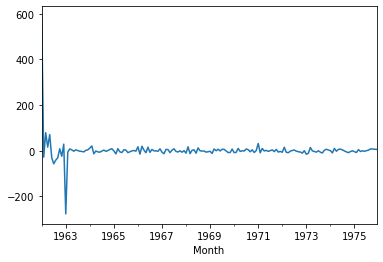

In [65]:
result.resid.plot()

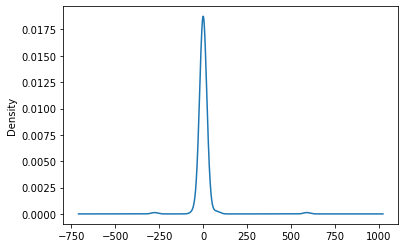

In [66]:
result.resid.plot(kind="kde")

In [67]:
len(df["pounds per cow"])

168

In [68]:
df["forecast"] = result.predict(start=150, end=168, dynamic=True)

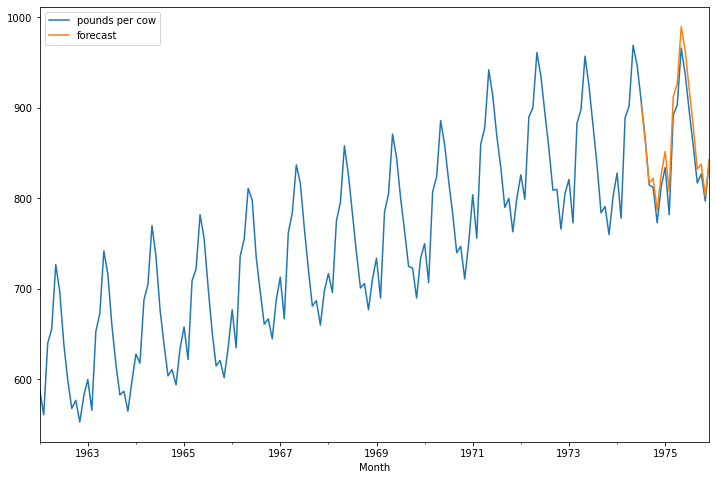

In [69]:
df[["pounds per cow", "forecast"]].plot(figsize=(12,8))

Rolling Forecast

In [80]:
shampoo = pd.read_csv("./data/sales-of-shampoo.csv", index_col="Month", parse_dates=True, date_parser=dateparser)

In [74]:
from datetime import datetime

In [79]:
def dateparser(x):
    return datetime.strptime("190"+x, "%Y-%m")
    # "1-01" -> "1901-01"

In [81]:
shampoo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 1901-01-01 to 1903-12-01
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales of shampoo  36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


In [84]:
adf_check(shampoo["Sales of shampoo"])

Non-stationary 1.0


In [85]:
shampoo["1st diff"] = shampoo["Sales of shampoo"] - shampoo["Sales of shampoo"].shift(1)

In [86]:
adf_check(shampoo["1st diff"].dropna())

Stationary 1.799857414168716e-10


d = [1, 2]

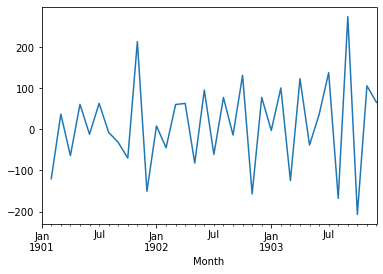

In [87]:
shampoo["1st diff"].plot()

In [88]:
shampoo["2nd diff"] = shampoo["1st diff"] - shampoo["1st diff"].shift(1)

In [89]:
adf_check(shampoo["2nd diff"].dropna())

Stationary 0.003906334939660398


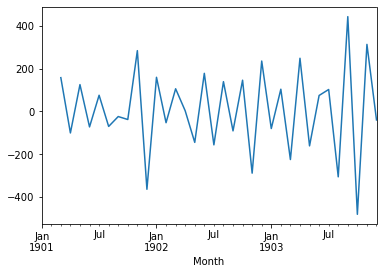

In [90]:
shampoo["2nd diff"].plot()

In [92]:
from statsmodels.tsa.arima_model import ARIMA

In [99]:
p = list(range(0,5))
d = [1, 2]
q = [0]

In [93]:
import itertools

In [100]:
pdq = list(itertools.product(p,d,q))

In [97]:
pdq

[(0, 1, 0),
 (0, 2, 0),
 (1, 1, 0),
 (1, 2, 0),
 (2, 1, 0),
 (2, 2, 0),
 (3, 1, 0),
 (3, 2, 0)]

In [101]:
for param in pdq:
    model = ARIMA(shampoo["Sales of shampoo"], order=param)
    result = model.fit()
    print("ARIMA{} - AIC:{}".format(param, result.aic))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency informa

ARIMA(0, 1, 0) - AIC:430.87311187552797
ARIMA(0, 2, 0) - AIC:461.1578257086931
ARIMA(1, 1, 0) - AIC:406.0222895932319
ARIMA(1, 2, 0) - AIC:423.9000860383601
ARIMA(2, 1, 0) - AIC:403.6275641167771
ARIMA(2, 2, 0) - AIC:412.99938249706025


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency informa

ARIMA(3, 1, 0) - AIC:404.6924591816528
ARIMA(3, 2, 0) - AIC:410.9109265845773
ARIMA(4, 1, 0) - AIC:404.7867685566954
ARIMA(4, 2, 0) - AIC:403.9482289506809


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


The Smaller the AIC, the Better

In [104]:
p, d, q = (4, 2, 0)

In [105]:
X = shampoo["Sales of shampoo"].values

In [146]:
size = int(len(X) * 0.66)
train, test = X[:size], X[size:]
history = [x for x in train]
predictions = []

In [147]:
for t in range(len(test)):
    model = ARIMA(history, order=(2, 1, 0))
    result = model.fit(disp=0)
    output = result.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [148]:
from sklearn.metrics import mean_squared_error

In [149]:
error = mean_squared_error(test, predictions)

In [150]:
rmse = np.sqrt(error)

In [151]:
rmse

75.43159888214257

In [152]:
shampoo["Sales of shampoo"].describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales of shampoo, dtype: float64

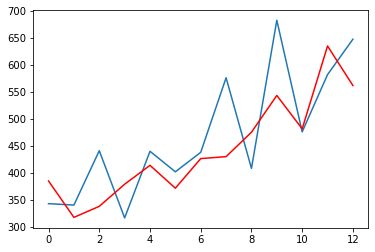

In [153]:
plt.plot(test)
plt.plot(predictions, color="red")